# <u> Part I - Prosper Loan Data Exploration </u>
## by Nicole Wambui

## <u> Introduction </u>

This dataset comprises of a wide variety of metrics on 113,937 loans offered by a financing company called _Prosper_.

## <u> Preliminary Wrangling </u>

In order to perform a comprehensive analysis of the different vairables of the dataset, it's best to first understand the different features it has and see if any cleanliness or tidiness issues need to be sorted out before going into the exploration phase.

In [1]:
#this is a simple code I use to format all my tables in a more professional way.

In [2]:
%%HTML
<style type='text/css'>
    table.dataframe td, table.datafram th {
        border-style: solid;
        border: 1px solid lightgrey;
    }
</style>

In [3]:
# import all the necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
#load the dataset
df_old = pd.read_csv('prosperLoanData.csv')

In [5]:
#preview the dataset
df_old.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#get in-dpeth info about the columns
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
#determine the number of null values in the dataset.
null_values = df_old.isnull().sum() #add the null values rather than have the entire dataset represented with boolean values
null_values.to_frame() #convert the series into a dataframe
null_values.sample(7) #view a sample of the null values

LP_GrossPrincipalLoss                  0
OpenRevolvingAccounts                  0
IncomeRange                            0
AmountDelinquent                    7622
CreditGrade                        84984
LP_NonPrincipalRecoverypayments        0
IncomeVerifiable                       0
dtype: int64

In [8]:
#get a summary of descriptive stats for all quantitative variables.
df_old.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


- The dataset currently has $81$ variables which is quite a number. I will create a trial dataframe looking over different variables that seem like they would be useful for further investigation.

In [9]:
#creating a new df to play around with variables that seem to be of interest and how useful they would be in the exploration.
df_trial = df_old.iloc[:, [11, 12, 16, 18, 19, 21, 35, 36, 47, 48, 49, 53, 54, 55, 57, 59, 63, 67, 77]]
df_trial

,EstimatedLoss,EstimatedReturn,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalOutstanding,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
0,NaN,NaN,0,Other,Self-employed,True,2.0,472.0,"$25,000-49,999",True,3083.333333,NaN,NaN,NaN,NaN,0,9425,330.43,0
1,0.0249,0.05470,2,Professional,Employed,False,0.0,0.0,"$50,000-74,999",True,6125.000000,NaN,NaN,NaN,NaN,0,10000,318.93,0
2,NaN,NaN,0,Other,Not available,False,1.0,NaN,Not displayed,True,2083.333333,NaN,NaN,NaN,NaN,0,3001,123.32,0
3,0.0249,0.06000,16,Skilled Labor,Employed,True,4.0,10056.0,"$25,000-49,999",True,2875.000000,NaN,NaN,NaN,NaN,0,10000,321.45,0
4,0.0925,0.09066,2,Executive,Employed,True,0.0,0.0,"$100,000+",True,9583.333333,11.0,0.0,0.0,9947.90,0,15000,563.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.0699,0.09500,1,Food Service Management,Employed,True,0.0,0.0,"$50,000-74,999",True,4333.333333,NaN,NaN,NaN,NaN,0,10000,364.74,0
113933,0.0200,0.08070,7,Professional,Employed,True,1.0,5062.0,"$75,000-99,999",True,8041.666667,60.0,0.0,0.0,4815.42,0,2000,65.57,0
113934,0.1025,0.08578,1,Other,Employed,True,0.0,0.0,"$25,000-49,999",True,2875.000000,NaN,NaN,NaN,NaN,0,10000,273.35,0
113935,0.0850,0.15950,2,Food Service,Full-time,True,0.0,0.0,"$25,000-49,999",True,3875.000000,16.0,0.0,0.0,3264.37,0,15000,449.55,0


In [10]:
#code to check how many null values are present in each of the selected variables of interest
df_trial.isnull().sum()

EstimatedLoss                          29084
EstimatedReturn                        29084
ListingCategory (numeric)                  0
Occupation                              3588
EmploymentStatus                        2255
IsBorrowerHomeowner                        0
CurrentDelinquencies                     697
AmountDelinquent                        7622
IncomeRange                                0
IncomeVerifiable                           0
StatedMonthlyIncome                        0
OnTimeProsperPayments                  91852
ProsperPaymentsLessThanOneMonthLate    91852
ProsperPaymentsOneMonthPlusLate        91852
ProsperPrincipalOutstanding            91852
LoanCurrentDaysDelinquent                  0
LoanOriginalAmount                         0
MonthlyLoanPayment                         0
Recommendations                            0
dtype: int64

In [11]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   EstimatedLoss                        84853 non-null   float64
 1   EstimatedReturn                      84853 non-null   float64
 2   ListingCategory (numeric)            113937 non-null  int64  
 3   Occupation                           110349 non-null  object 
 4   EmploymentStatus                     111682 non-null  object 
 5   IsBorrowerHomeowner                  113937 non-null  bool   
 6   CurrentDelinquencies                 113240 non-null  float64
 7   AmountDelinquent                     106315 non-null  float64
 8   IncomeRange                          113937 non-null  object 
 9   IncomeVerifiable                     113937 non-null  bool   
 10  StatedMonthlyIncome                  113937 non-null  float64
 11  OnTimeProsper

### What is the structure of your dataset?

- The loan dataset has $113,936$ rows and $81$ columns. Most variables are numeric (mostly float, then integers) but there are a sizeable number of columns that are qualitative in nature and represented as object dtypes with a few boolean dtypes as well. There are quite a number of null values in the dataset, with the `LoanFirstDefaultedCycleNumber` column having only $16,952$ values.

- The variable `ListingCategory (numeric)` has a key in a different file linked [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) and also added in table format below for easy reference during the analysis:

| Listing Category # | Category |
| :---: | :--- |
| 0 | Not Available |
| 1 | Debt Consolidation|
| 2 | Home Improvement |
| 3 | Business |
| 4 | Personal Loan |
| 5 | Student Use | 
| 6 | Auto |
| 7 | Other |
| 8 | Baby & Adoption |
| 9 | Boat |
| 10 | Cosmetic Procedure |
| 11 | Engagement Ring |
| 12 | Green Loans |
| 13 | Household Expenses |
| 14 | Large Purchases |
| 15 | Medical/Dental |
| 16 | Motorcycle |
| 17 | RV |
| 18 | Taxes |
| 19 | Vacation |
| 20 | Wedding Loans |


### What is/are the main feature(s) of interest in your dataset?

- Given that there are $81$ variables to investigate, at first it was difficult to figure out what to focus on. I am however quite interested in figuring out what borrower metrics influence the loan amount and delinquency rates.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- I believe that income, employment status, and recommendations would be the best predicting features of the loan amount someone would receive and the number of delinquent payments they would have. 

- I created a trial data frame that contained 19 variables of interest. After taking into account that some variables had many null values, I finally settled on focusing on the following variables:
> 1. `ListingCategory`
> 2. `Occupation`                          
> 3. `EmploymentStatus`                     
> 4. `IsBorrowerHomeowner`                   
> 5. `CurrentDelinquencies` 
> 6. `IncomeRange`                           
> 7. `IncomeVerifiable`                       
> 8. `StatedMonthlyIncome`  
> 9. `LoanCurrentDaysDelinquent`            
> 10. `LoanOriginalAmount`  
> 11. `MonthlyLoanPayment`                   
> 12. `Recommendations` 

## <u> Data Wrangling </u>


In [13]:
#first focus on making a copy so that I can ensure that the dataset is clean and tidy after going through it.
df_new = df_trial.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   EstimatedLoss                        84853 non-null   float64
 1   EstimatedReturn                      84853 non-null   float64
 2   ListingCategory (numeric)            113937 non-null  int64  
 3   Occupation                           110349 non-null  object 
 4   EmploymentStatus                     111682 non-null  object 
 5   IsBorrowerHomeowner                  113937 non-null  bool   
 6   CurrentDelinquencies                 113240 non-null  float64
 7   AmountDelinquent                     106315 non-null  float64
 8   IncomeRange                          113937 non-null  object 
 9   IncomeVerifiable                     113937 non-null  bool   
 10  StatedMonthlyIncome                  113937 non-null  float64
 11  OnTimeProsper

In [14]:
df_new.isnull().sum()

EstimatedLoss                          29084
EstimatedReturn                        29084
ListingCategory (numeric)                  0
Occupation                              3588
EmploymentStatus                        2255
IsBorrowerHomeowner                        0
CurrentDelinquencies                     697
AmountDelinquent                        7622
IncomeRange                                0
IncomeVerifiable                           0
StatedMonthlyIncome                        0
OnTimeProsperPayments                  91852
ProsperPaymentsLessThanOneMonthLate    91852
ProsperPaymentsOneMonthPlusLate        91852
ProsperPrincipalOutstanding            91852
LoanCurrentDaysDelinquent                  0
LoanOriginalAmount                         0
MonthlyLoanPayment                         0
Recommendations                            0
dtype: int64

### Data Cleaning:

**a) Observation:**
- Columns have null values ranging from $0$ to $91,000$. 

**b) Cleaning:**
- Remove the columns with less than $100,000$ values, and remove all null values.

In [15]:
#remove columns with less than 100,000 values.
labels = ["EstimatedLoss", "EstimatedReturn", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalOutstanding"]
df_new = df_new.drop(labels = labels, axis = 1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCategory (numeric)  113937 non-null  int64  
 1   Occupation                 110349 non-null  object 
 2   EmploymentStatus           111682 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   CurrentDelinquencies       113240 non-null  float64
 5   AmountDelinquent           106315 non-null  float64
 6   IncomeRange                113937 non-null  object 
 7   IncomeVerifiable           113937 non-null  bool   
 8   StatedMonthlyIncome        113937 non-null  float64
 9   LoanCurrentDaysDelinquent  113937 non-null  int64  
 10  LoanOriginalAmount         113937 non-null  int64  
 11  MonthlyLoanPayment         113937 non-null  float64
 12  Recommendations            113937 non-null  int64  
dtypes: bool(2), float64(4), int64

In [16]:
#remove observations with null values for occuptaion, delinquent amount, and employment status.
df_new = df_new.dropna(axis = 0, how = "any").reset_index(drop = True)
df_new

,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
0,0,Other,Self-employed,True,2.0,472.0,"$25,000-49,999",True,3083.333333,0,9425,330.43,0
1,2,Professional,Employed,False,0.0,0.0,"$50,000-74,999",True,6125.000000,0,10000,318.93,0
2,16,Skilled Labor,Employed,True,4.0,10056.0,"$25,000-49,999",True,2875.000000,0,10000,321.45,0
3,2,Executive,Employed,True,0.0,0.0,"$100,000+",True,9583.333333,0,15000,563.97,0
4,1,Professional,Employed,True,0.0,0.0,"$100,000+",True,8333.333333,0,15000,342.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104977,1,Food Service Management,Employed,True,0.0,0.0,"$50,000-74,999",True,4333.333333,0,10000,364.74,0
104978,7,Professional,Employed,True,1.0,5062.0,"$75,000-99,999",True,8041.666667,0,2000,65.57,0
104979,1,Other,Employed,True,0.0,0.0,"$25,000-49,999",True,2875.000000,0,10000,273.35,0
104980,2,Food Service,Full-time,True,0.0,0.0,"$25,000-49,999",True,3875.000000,0,15000,449.55,0


**c) Test:**
- Confirm that all null values have been removed and all columns have the same number of values.

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104982 entries, 0 to 104981
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCategory (numeric)  104982 non-null  int64  
 1   Occupation                 104982 non-null  object 
 2   EmploymentStatus           104982 non-null  object 
 3   IsBorrowerHomeowner        104982 non-null  bool   
 4   CurrentDelinquencies       104982 non-null  float64
 5   AmountDelinquent           104982 non-null  float64
 6   IncomeRange                104982 non-null  object 
 7   IncomeVerifiable           104982 non-null  bool   
 8   StatedMonthlyIncome        104982 non-null  float64
 9   LoanCurrentDaysDelinquent  104982 non-null  int64  
 10  LoanOriginalAmount         104982 non-null  int64  
 11  MonthlyLoanPayment         104982 non-null  float64
 12  Recommendations            104982 non-null  int64  
dtypes: bool(2), float64(4), int64

**a) Observation:**

- `IncomeRange`, `EmploymentStatus` and `ListingCategory (numeric)` are listed as "object" and "integer" data types (respectively).

**b) Cleaning:**

- Convert both variables into category data types.

In [18]:
#manually set an order for the income range and convert it to category data type
income_class = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", "Not employed", "Not displayed"]
incomeclasses = pd.api.types.CategoricalDtype(ordered = True, categories = income_class)
df_new["IncomeRange"] = df_new["IncomeRange"].astype(incomeclasses);

list_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
listclasses = pd.api.types.CategoricalDtype(ordered = True, categories = list_class)
df_new["ListingCategory (numeric)"] = df_new["ListingCategory (numeric)"].astype(listclasses);

employment_class = ["Employed", "Full-time", "Not employed", "Other", "Part-time", "Retired", "Self-employed"]
employmentclasses = pd.api.types.CategoricalDtype(ordered = True, categories = employment_class)
df_new["EmploymentStatus"] = df_new["EmploymentStatus"].astype(employmentclasses);

**c) Test:**

- Confirm that the variables have been transformed into the right data types.

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104982 entries, 0 to 104981
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingCategory (numeric)  104982 non-null  category
 1   Occupation                 104982 non-null  object  
 2   EmploymentStatus           104982 non-null  category
 3   IsBorrowerHomeowner        104982 non-null  bool    
 4   CurrentDelinquencies       104982 non-null  float64 
 5   AmountDelinquent           104982 non-null  float64 
 6   IncomeRange                104982 non-null  category
 7   IncomeVerifiable           104982 non-null  bool    
 8   StatedMonthlyIncome        104982 non-null  float64 
 9   LoanCurrentDaysDelinquent  104982 non-null  int64   
 10  LoanOriginalAmount         104982 non-null  int64   
 11  MonthlyLoanPayment         104982 non-null  float64 
 12  Recommendations            104982 non-null  int64   
dtypes: bool(2), ca

**a) Observation:**

- `StatedMonthlyIncome` and `MonthlyLoanPayment`values have 6 and 2 decimal places (respectively).

**b) Cleaning:**

- Round the values and remove the decimal places since it's not really relevant.

In [20]:
df_new = df_new.round({"StatedMonthlyIncome": 0, "MonthlyLoanPayment": 0}) #convert the column to remove the decimal places using the round() function

**c) Test:**

- Confirm that the variables have been transformed into the right data types.

In [21]:
df_new.head(3)

,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
0,0,Other,Self-employed,True,2.0,472.0,"$25,000-49,999",True,3083.0,0,9425,330.0,0
1,2,Professional,Employed,False,0.0,0.0,"$50,000-74,999",True,6125.0,0,10000,319.0,0
2,16,Skilled Labor,Employed,True,4.0,10056.0,"$25,000-49,999",True,2875.0,0,10000,321.0,0


**a) Observation:**

- `MonthlyLoanPayment`,`StatedMonthlyIncome`, `AmountDelinquent` and `CurrentDelinquencies` are listed as "float" data types.

**b) Cleaning:**

- Convert variables into integer data types.

In [22]:
df_new = df_new.astype({"MonthlyLoanPayment":'int', "StatedMonthlyIncome":'int', "AmountDelinquent":'int', "CurrentDelinquencies": 'int'}) 

**c) Test:**

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104982 entries, 0 to 104981
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingCategory (numeric)  104982 non-null  category
 1   Occupation                 104982 non-null  object  
 2   EmploymentStatus           104982 non-null  category
 3   IsBorrowerHomeowner        104982 non-null  bool    
 4   CurrentDelinquencies       104982 non-null  int32   
 5   AmountDelinquent           104982 non-null  int32   
 6   IncomeRange                104982 non-null  category
 7   IncomeVerifiable           104982 non-null  bool    
 8   StatedMonthlyIncome        104982 non-null  int32   
 9   LoanCurrentDaysDelinquent  104982 non-null  int64   
 10  LoanOriginalAmount         104982 non-null  int64   
 11  MonthlyLoanPayment         104982 non-null  int32   
 12  Recommendations            104982 non-null  int64   
dtypes: bool(2), ca

In [24]:
#export the created df to ensure we have a copy of the cleaned data as a backup file.
df_new.to_csv('ProsperLoanDataCleaned.csv')

## <u> Univariate Exploration </u>

### 1. Original Loan Amount

**_What is the most common loan amount given to borrowers?_**

- To answer this question, we'll look at the distribution of loan amounts given to borrowers.

In [25]:
df = df_new.copy() #create a copy of the dataframe to have something to revert to incase of any challenges when visualising.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104982 entries, 0 to 104981
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingCategory (numeric)  104982 non-null  category
 1   Occupation                 104982 non-null  object  
 2   EmploymentStatus           104982 non-null  category
 3   IsBorrowerHomeowner        104982 non-null  bool    
 4   CurrentDelinquencies       104982 non-null  int32   
 5   AmountDelinquent           104982 non-null  int32   
 6   IncomeRange                104982 non-null  category
 7   IncomeVerifiable           104982 non-null  bool    
 8   StatedMonthlyIncome        104982 non-null  int32   
 9   LoanCurrentDaysDelinquent  104982 non-null  int64   
 10  LoanOriginalAmount         104982 non-null  int64   
 11  MonthlyLoanPayment         104982 non-null  int32   
 12  Recommendations            104982 non-null  int64   
dtypes: bool(2), ca

In [27]:
loan_amounts = df.LoanOriginalAmount.describe() #get the descriptive stats for the variable to be able to plot the bins appropriately
print(loan_amounts)

count    104982.000000
mean       8576.659942
std        6277.829975
min        1000.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64


In [73]:
#create a function to define histograms and other plot features since we'll use them a lot
def plot(a, b):
    plt.figure(figsize = [a, b]);
    
def hist(g, h, i):
    plt.hist(data = g, x = h, bins = i);
    
def pltlabels(j, k, l):
    plt.title(j);
    plt.xlabel(k)
    plt.ylabel(l);

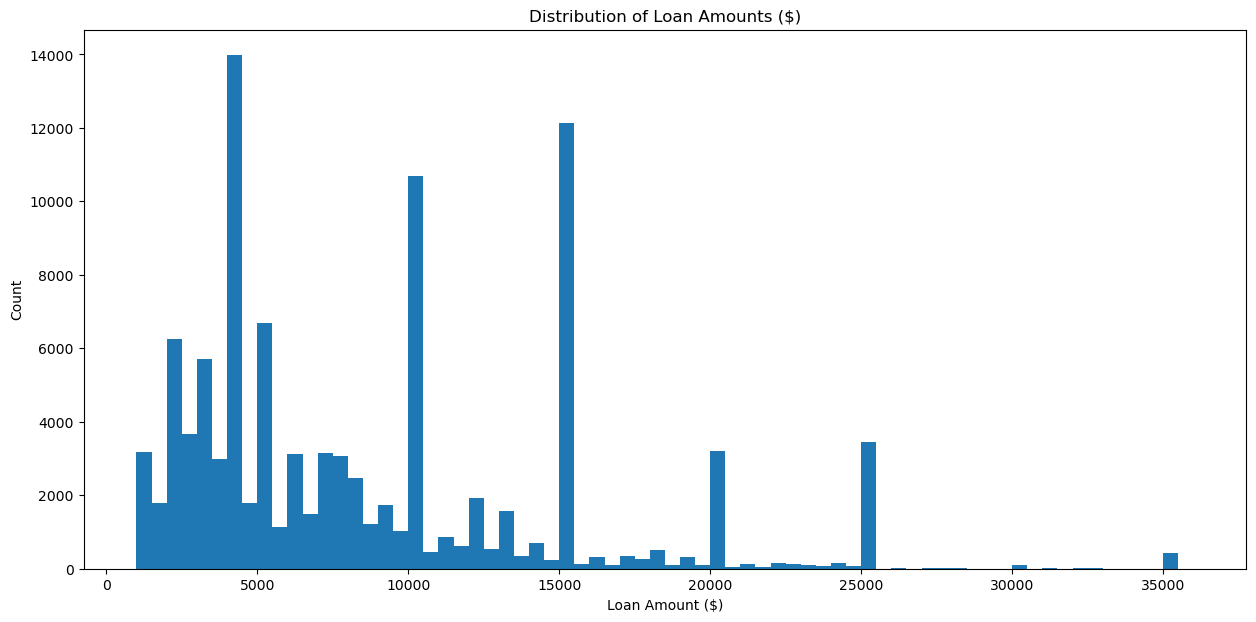

In [74]:
plot(15, 7)
bins_loans = np.arange(999.5, 35000 + 1000, 500)
hist(df, "LoanOriginalAmount", bins_loans)
pltlabels("Distribution of Loan Amounts ($)", "Loan Amount ($)", "Count")

> **Loan Amount Observations:**
>
> - The loan distribution amount seems to be left skewed.
>
> - There appear to be 3 very common loans which are:
    > $4,000$ dollars - 14,000 disbursed loans
    > $10,000$ dollars - 11,000 disbursed loans
    > $15,000$ dollars - 12, 000 disbused loans
> - One interesting observation is that the highest loan amount of $35,000$ dollars has under 1,000 loans disbrused in this bracket, but is still more common than other loan amounts, like the loans ranging between $20,000$ and $25,000$ dollars which have counts lower than 500 loans disbursed.

### 2. Current Delinquencies

**_How common are delinquent payments among borrowers?_**

- We'll look at the distribution of the number of delinquent payments in the dataset.

In [30]:
df.CurrentDelinquencies.describe()

count    104982.000000
mean          0.458793
std           1.570630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

In [31]:
#create a def function for instances where the y-scale needs to be transformed
def ys(scale):
    plt.yscale(scale)
    
def yt(labels, ticks):
    plt.yticks(labels = labels, ticks = ticks)

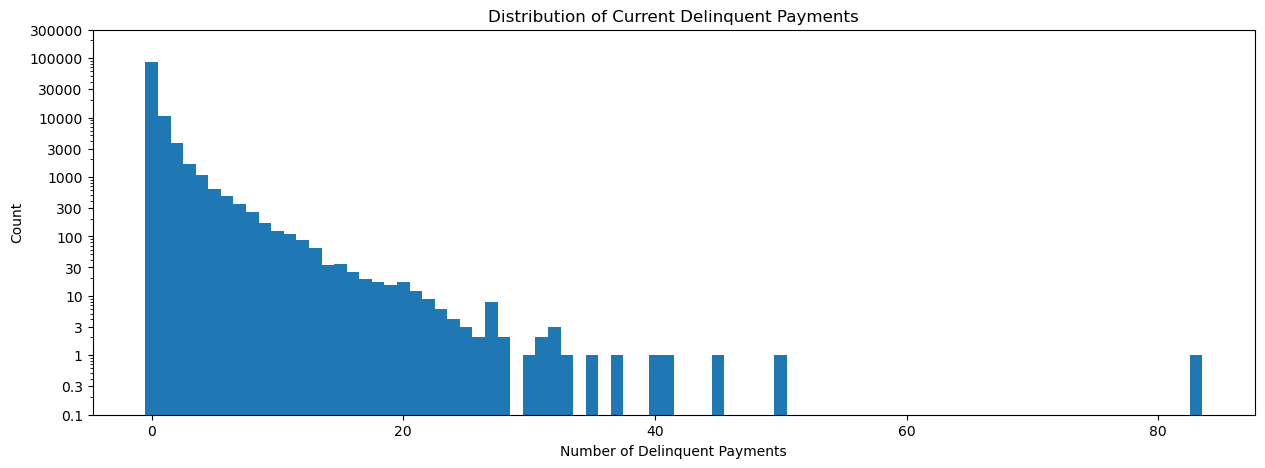

In [75]:
plot(15, 5)
bins_delinquent = np.arange(-0.5, 83 + 1, 1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000] #create relevant tick marks
labels = [i for i in ticks] #create labels based on the tickmarks
hist(df, "CurrentDelinquencies", bins_delinquent);
ys('log');
yt(labels, ticks);
pltlabels("Distribution of Current Delinquent Payments", "Number of Delinquent Payments", "Count")

> **Current Delinquencies Observations:**
>
> - The distribution of the number of delinquencies seems to be left-skewed.
>
> - Most borrowers seem to make their payments on time with 100,000 borrowers (out of the total 104,982) borrowers having $0$ delinquent payments. 
>
> - The highest number of delinquencies is $83$ but can only be attributed to one borrower.

### 3. Amount Delinquent

**_What is the average amount of delinquent payments owed by borrowers?_**

- We'll look at the distribution of delinquent payments amounts in the dataset.

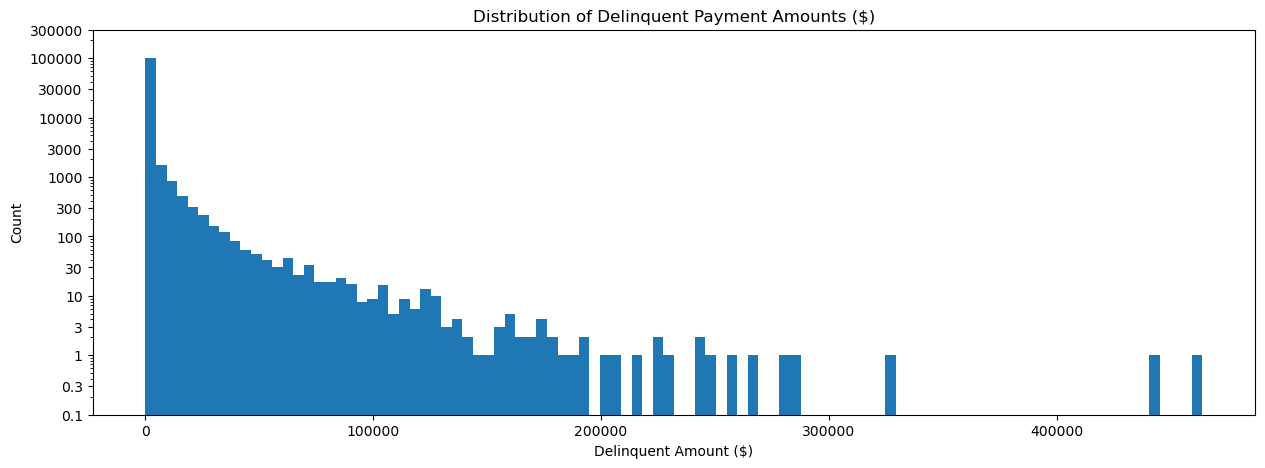

In [76]:
plot(15, 5)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = [i for i in ticks]
hist(df, "AmountDelinquent", 100);
ys('log');
yt(labels, ticks);
pltlabels("Distribution of Delinquent Payment Amounts ($)", "Delinquent Amount ($)", "Count")

> **Amount Delinquent Observation:**
>
> - Most borrowers do not have any delinquent payments as observed previously, with 100,000 borrowers (out of the total 104,982) having $0$ dollars worth of delinquent payments.
> - Most borrowers who have delinquent payments owe less than $100,000$ dollars. The highest delinquent amounts are only $2$ and fall between $400,000$ and $500,000$ dollars.

### 4. Monthly Loan Payment
**_How much on average do borrowers pay back on their loans per month?_**

- We'll look at the distribution of monthly loan payments in the dataset.

In [36]:
df.MonthlyLoanPayment.describe()

count    104982.000000
mean        279.314187
std         192.499751
min           0.000000
25%         139.000000
50%         229.000000
75%         378.000000
max        2252.000000
Name: MonthlyLoanPayment, dtype: float64

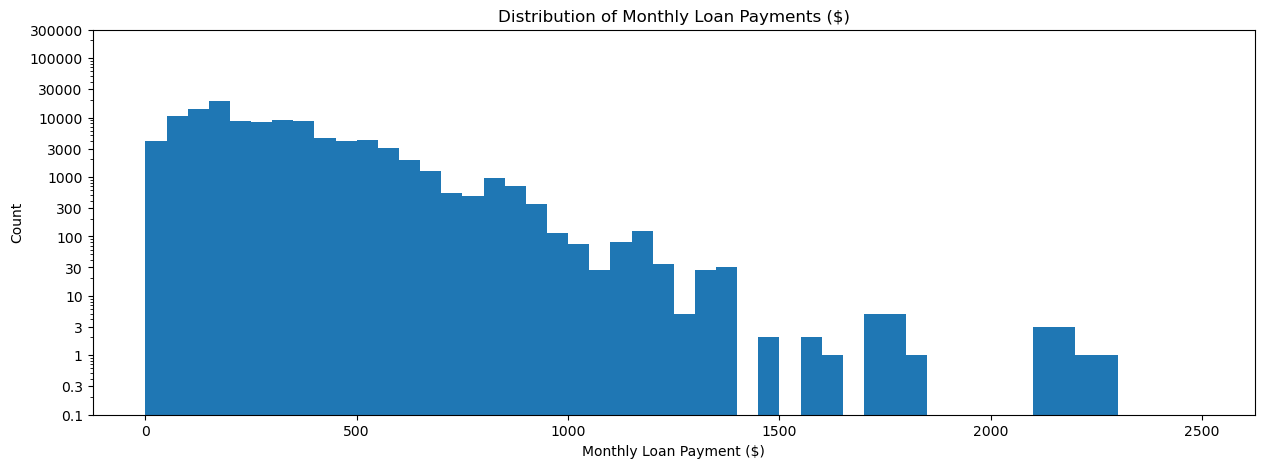

In [77]:
plot(15, 5)
bins_payment = np.arange(0, 2500 + 50, 50)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
labels = [i for i in ticks]
hist(df, "MonthlyLoanPayment", bins_payment);
ys('log');
yt(labels, ticks);
pltlabels("Distribution of Monthly Loan Payments ($)", "Monthly Loan Payment ($)", "Count")

> **Monthly Loan Payment Observations:**
>
> - The distribution is left-skewed.
>
> - Most payments seem to fall below $1,000$ dollars per month. About $30,000$ borrowers make monthly loan payments of around 250 dollars. The highest loan payments are between $2,000$ and $2,500$ dollars, which can only be attributed to 4 borrowers.

### 5. Stated Monthly Income
**_How much on average do borrowers earn per month?_**

- We'll look at the dstribution of the listed monthly income in the dataset.

In [38]:
print(df.StatedMonthlyIncome.value_counts())
df.StatedMonthlyIncome.describe()

4167     3297
5000     3140
3333     2699
5417     2238
3750     2230
         ... 
1923        1
12675       1
7002        1
29185       1
18756       1
Name: StatedMonthlyIncome, Length: 7579, dtype: int64


count    1.049820e+05
mean     5.696031e+03
std      7.648767e+03
min      0.000000e+00
25%      3.333000e+03
50%      4.780000e+03
75%      6.917000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

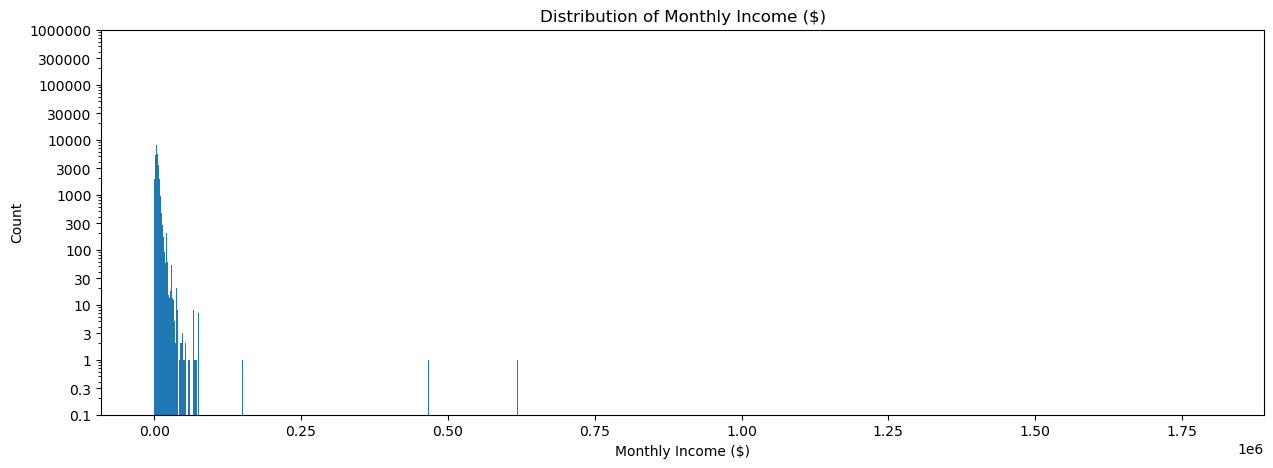

In [78]:
plot(15, 5)
bins_income = np.arange(0, 1800000, 500) 
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]
labels = [i for i in ticks]
hist(df, "StatedMonthlyIncome", bins_income);
ys('log');
yt(labels, ticks);
pltlabels("Distribution of Monthly Income ($)", "Monthly Income ($)", "Count")

- Though it is difficult to tell from the above visualisation, it appears some borrowers have listed their monthly income as above $100,000$ dollars. I have decided to create a new dataframw excluding these values because they do not seem to be valid data and may be skewing the results.

In [43]:
#incase this decision affects any other variables, create a new dataframe.
df_2 = df[df.StatedMonthlyIncome <= 100000]
df_2.StatedMonthlyIncome.describe()

count    104968.000000
mean       5646.163526
std        4121.172784
min           0.000000
25%        3333.000000
50%        4778.000000
75%        6917.000000
max      100000.000000
Name: StatedMonthlyIncome, dtype: float64

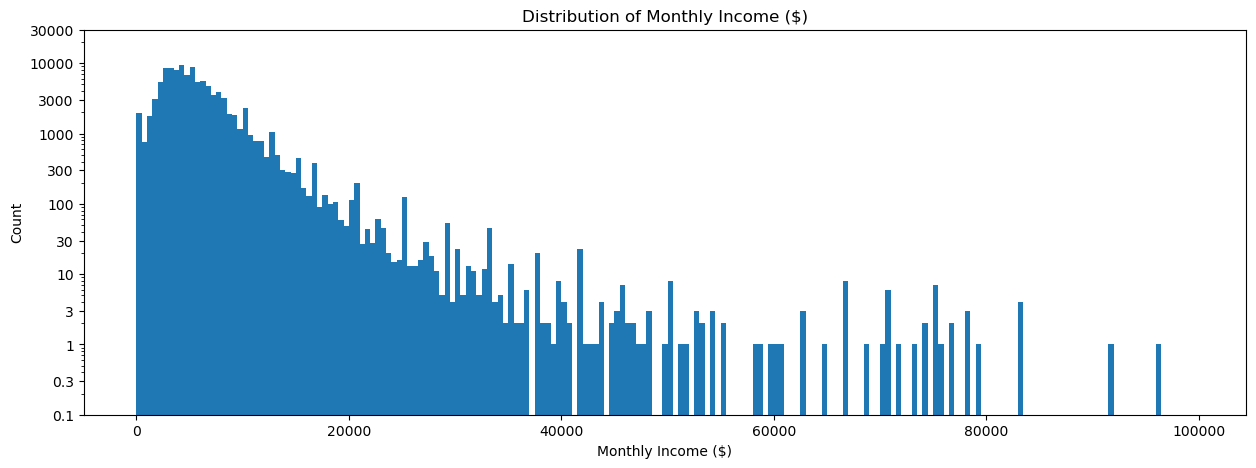

In [79]:
plot(15, 5)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
bins_income = np.arange(0, 100000, 500)
labels = [i for i in ticks]
hist(df_2, "StatedMonthlyIncome", bins_income);
ys('log');
yt(labels, ticks);
pltlabels("Distribution of Monthly Income ($)", "Monthly Income ($)", "Count")

> **Stated Monthly Income Observations:**
>
> - The distribution of monthly income is left-skewed and most borrowers in the dataset appear to earn less than $10,000$ dollars a month.
>
> - Give that there were a number of borrowers in initial dataframe that were listed as earning over $150,000$ dollars a month. some questions can be raised about the validity of the data.

### 6. Employment Status

**_Are borrowers more likely to be employed or unemployed?_**

- We'll check the counts for the number of borrowers in each employment category

In [61]:
#create a function for countplots
def count(data, x, colour, hue):
    sns.countplot(data = data, x = x, color = colour, hue = hue)

def xt(i):
    plt.xticks(rotation = i)

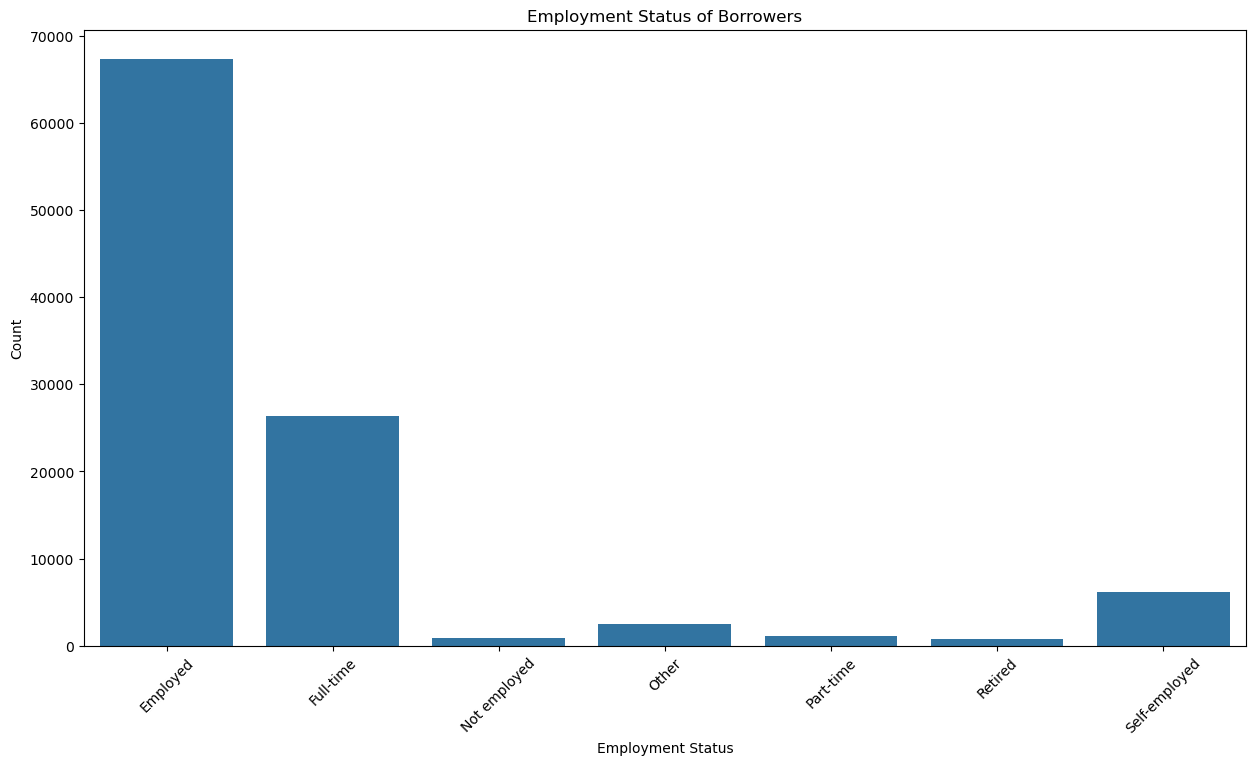

In [80]:
#We can create a bar chart since we are working with a nominal variable.
my_colour = sns.color_palette(palette = None, as_cmap = True)[0] #set a standard colour for each bar.
plot(15, 8)
count(df, "EmploymentStatus", my_colour, None);
xt(45);
pltlabels("Employment Status of Borrowers", "Employment Status", "Count")

In [56]:
df.EmploymentStatus.value_counts() #confirm the numbers shown in the viz particularly for the lowest 3 categories

Employed         67322
Full-time        26342
Self-employed     6132
Other             2474
Part-time         1084
Not employed       833
Retired            795
Name: EmploymentStatus, dtype: int64

> **Employment observation:**
>
> - The **employed** category accounts for $67,000$ borrowers, making it the highest category. The second highest category is **"full-time"** and account for $27,000$ borrowers. However, it is not exactly clear as to what that "full-time means. Other variable that have conflicting meanings are "Other" and "Part-time." This makes the variable hard to use for further analysis.
>
> - An interesting note here is that **unemployed** people secure more loans ($833$ loans) than **retired** people ($795$ loans).

### 7. Occupation

**_What is the most common occupation for borrowers?_**

- We will plot the counts for each occupation listed in the dataset to figure this out.

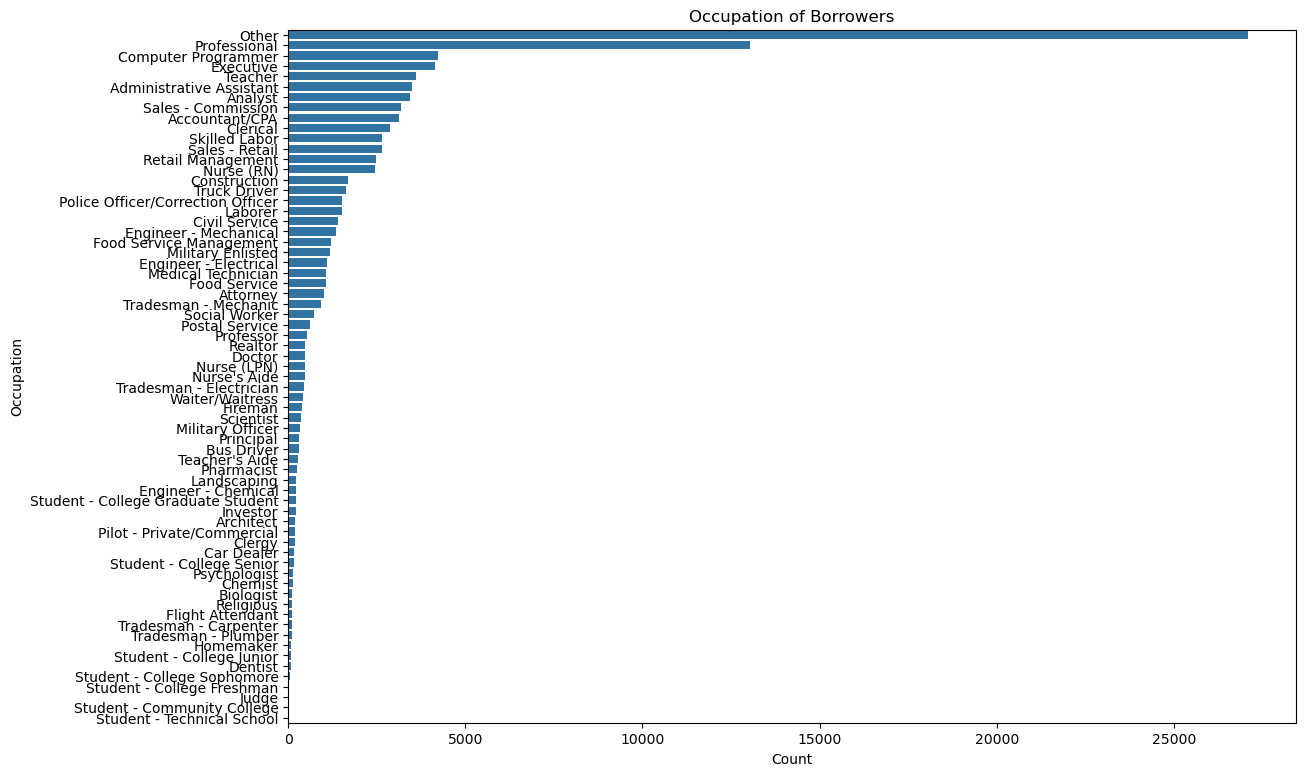

In [99]:
#create a barchart. We will not use the defined function since this plot requires customisation due to the number of values.
plot(13, 9)
order_occupation = df["Occupation"].value_counts().index
sns.countplot(data = df, y = "Occupation", order = order_occupation, color = my_colour);
pltlabels("Occupation of Borrowers", "Count", "Occupation")

In [100]:
df["Occupation"].value_counts()

Other                          27080
Professional                   13037
Computer Programmer             4216
Executive                       4151
Teacher                         3613
                               ...  
Student - College Sophomore       55
Student - College Freshman        37
Judge                             22
Student - Community College       20
Student - Technical School        10
Name: Occupation, Length: 67, dtype: int64

> **Occupation Observation:**
>
> - ***Other*** seems to be the most commonly listed option for occupation with over 25,000 borrowers in this category. The second most common one, ***Professional*** has about 13,000 borrowers under this category, but it also does not give us much description of the work. Therefore, the top 3, descriptively named professions are:
>    - Computer programmer (4,000+)
>    - Executive (4,000+)
>    - Teacher (3000+)
>
> Given that the most common descritions do not give us much information about the actual occupation of the borrower, it's difficult to get any meaningful insights from this variable.

### 8. Income Range

**_Is there a range of income that most borrowers fall under?_**

- To figure this out, we will plot the income ranges listed in the dataset to confirm their counts.

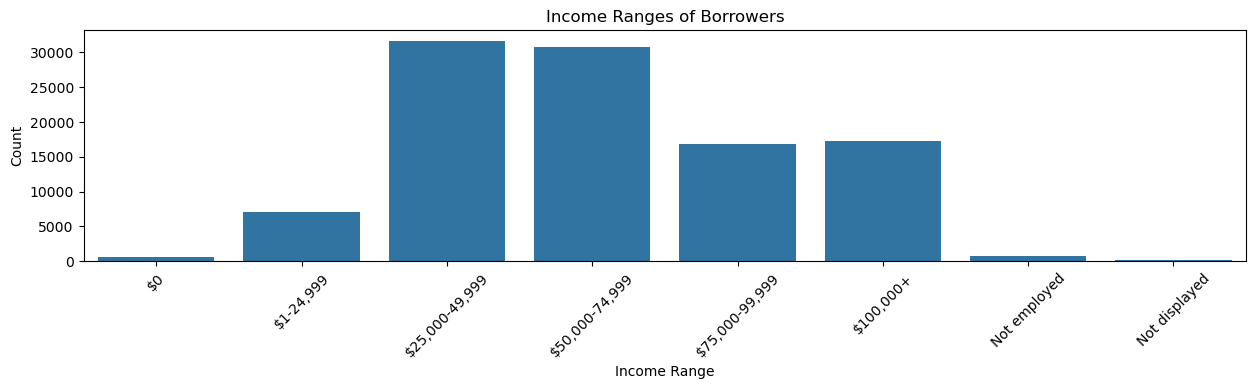

In [103]:
plot(15,3)
count(df, "IncomeRange", my_colour, None);
xt(45);
pltlabels("Income Ranges of Borrowers", "Income Range", "Count")

> **Income Range Observation:**
>
> - Most borrowers (over 60,000) seem to earn between $25,000$ and $75,000$ dollars a year. There are also borrowers who do not have their income displayed, are unemployed or do not earn anything.

### 9. Home Ownership

**_Are more borrowers likely to be homeowners or not?_**

- We'll plot the proportion of homeowners and non-homeowners in the dataset.

In [114]:
labels_ownership = df.IsBorrowerHomeowner.value_counts()
print(labels_ownership)

True     54313
False    50669
Name: IsBorrowerHomeowner, dtype: int64


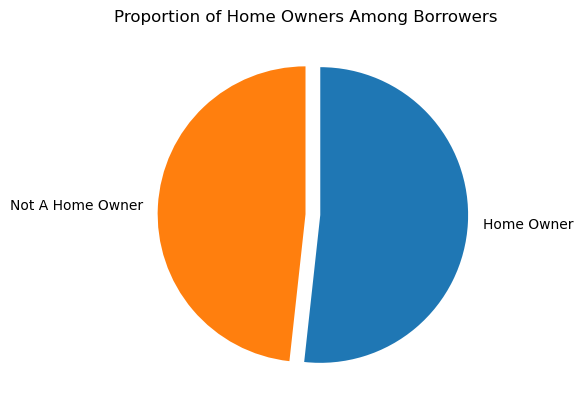

In [121]:
pie_home = ["Home Owner", "Not A Home Owner"]
plt.pie(labels_ownership, explode = [0.1, 0] , labels = pie_home, startangle = 90, counterclock = False);
plt.title("Proportion of Home Owners Among Borrowers");

> **Home Ownership observation:**
>
> - Slightly more than half of the borrowers ($57,478$) are **homeowners** and the rest ($56,459$) are not.

### 10. Income Verifiable

**_Do most of the borrowers have a verifiable income?_**

- To answer this question, we'll plot the proportion of borrowers with verifiable and non-verifiable income in the dataset.

In [122]:
labels_income = df.IncomeVerifiable.value_counts()
print(labels_income)

True     96433
False     8549
Name: IncomeVerifiable, dtype: int64


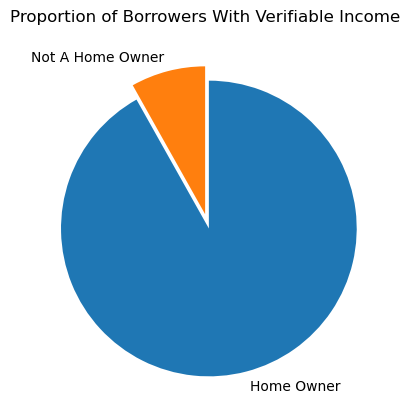

In [123]:
pie_income = ["Verifiable Income", "Non-Verifiable INcome"]
plt.pie(labels_income, explode = [0.1, 0] , labels = pie_home, startangle = 90, counterclock = False);
plt.title("Proportion of Borrowers With Verifiable Income");

> **Income Verifiable observation:**
>
> - Majority of the borrowers ($105,268$) have **verifiable income** and only a small percentage ($8,669$) do not.

### 11. Listing Category

**_What is the most common reason borrowers list for taking out loans?_**

- To answer theis question, we can look at the `Listing Category` variable and plot it to check the counts of each category.

In [124]:
#simple code to see the value counts to determine how to structure the bin edges.
print(df["ListingCategory (numeric)"].value_counts())

1     57199
7     10398
0      9349
2      7391
3      7184
6      2561
4      2392
13     1975
15     1500
18      880
14      865
20      769
19      758
5       756
16      304
11      217
8       199
10       91
9        85
12       58
17       51
Name: ListingCategory (numeric), dtype: int64


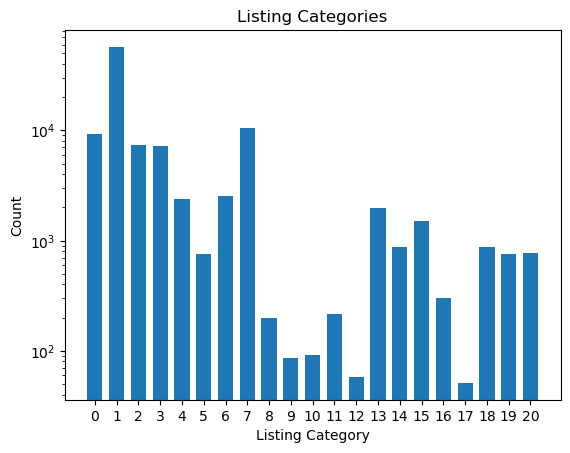

In [135]:
#create a special histogram plot that adds spaces in between the bins since we are working with categorical data that is numeric
list_bin_edges = np.arange(-0.5, 20.5 + 1, 1)
plt.hist(data = df, x = "ListingCategory (numeric)", bins = list_bin_edges, rwidth = 0.7, log = True) 
plt.xticks(np.arange(0, 20 + 1, 1));
pltlabels("Listing Categories", "Listing Category", "Count")
#add a section to correctly transform the yscale to represent logarithmic values of our own choice.

> **Listing Category Observations:**
>
> - From the above visualisation, we can see that listing category $1$ is the most popluar reason with over 57,000 borrowers taking out loans under this listing. From the [Prosper Loan Data - Variable Definitions](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) document, we can see that this listing represents _**"Debt consolidation"**_ which makes this the most popular reason that borrowers take out loans. The least popular listing category was `17` (_**RV**_) with only 51 loans taken out.

### 12. Recommendations

**_On average, how many recommendations do borrowers have when applying for loans?_**

- To figure this out, we will plot the distribution of recommendations listed for each borrower/loan in the dataset.

In [129]:
#simple code to see the value counts to determine how to structure the bin edges.
df.Recommendations.value_counts()

0     100739
1       3501
2        567
3        108
4         26
5         14
9          6
7          5
6          4
8          3
18         2
16         2
14         1
21         1
24         1
19         1
39         1
Name: Recommendations, dtype: int64

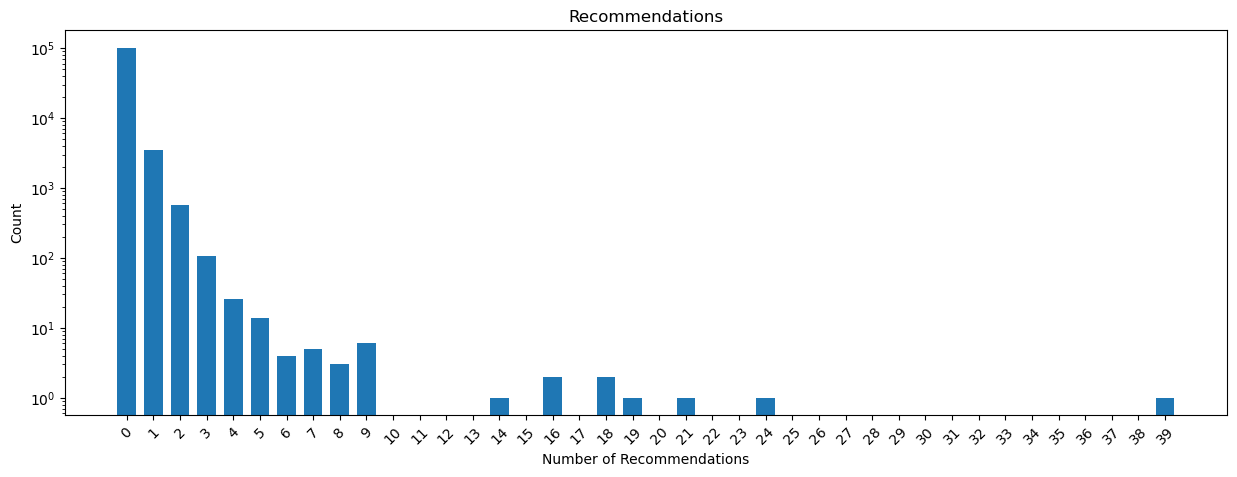

In [136]:
plot(15,5)
list_bin_edges = np.arange(-0.5, 39.5 + 1, 1)
plt.hist(data = df, x = "Recommendations", bins = list_bin_edges, rwidth = 0.7, log = True) ;
plt.xticks(np.arange(0, 39 + 1, 1), rotation = 45);
pltlabels("Recommendations", "Number of Recommendations", "Count")

> **Recommendations Observations:**
>
> - From the histogram, we can see that most borrowers (100,000) do not have any recommendations. Another interesting point here is the data showing there are people with between $14$ and $39$ recommendations. These appear to be related to about one or two borrowers and can be considered outliers.

### Univariate Discussion:

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - The y-scale needed to be converted from arithmetic to logarithmis when plotting the `Current Delinquencies`, `Amount Delinquent`, `MonthlyLoanPayment`, `StatedMonthlyIncome`, `Listing Category` and `Recommendations` variables. This is because some values have much lower counts and it got difficult to see them represented clearly on the plots. 
>
>
> - I also had to remove outliers when plotting `StatedMonthlyIncome` because the amounts listed seemed too erroneous with some borrowers listed as havnig income over $100,000$ dollars a month which did not seem to be valid data.


#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - I removed all the null values before doing the transformations and this was to be able to have as many variables as possible with all values to try and investigate relationships between the variables that would help us build effective customer profiles and determine the most useful features when predicting the likelihood of borrower defaulting.
>
>
> - I also converted some variables like `IncomeRange`, `EmploymentStatus` and `ListingCategory (numeric)` into category dtypes to make plotting much easier and to also have a manual order set for them.
>
>
> - It was interesting to see that there were borrowers who were unemployed, or listed their income as $0$ dollars. Additionally, there are borrowers who did not list any verifiable income, as well as borrowers who had upwards of $14$ recommendations. I find this unusual because it raises questions on the method used to determine a borrower's creditworthiness and likelihood of not defaulting.
>
>
> - Some variables such as `IsBorrowerHomeowener`, `Occupation` and `EmploymentStatus` had interesting distributions that made the variables not worth investigating further. For example, having employment statuses like _"full-time"_ and _"employed"_ and occupations like _"Other"_ and _"professional"_ were not really helpful metrics to look at. With the homeownership, given that the dataset was almost split evenly between the two, it did not seem like an interesting metric to investigate further.

## <u> Bivariate Exploration </u>

### 1. General Exploration
    
_**Which of our chosen variables have the strongest correlations?**_

- We will plot all the numeric varaibles against each other to have an idea of what properties to investigate next based on their correlation values.

In [131]:
#create a function to plot heatmaps
def heat(data):
    sns.heatmap(data.corr(), cmap = "viridis_r", annot = True, fmt = ".2f" );

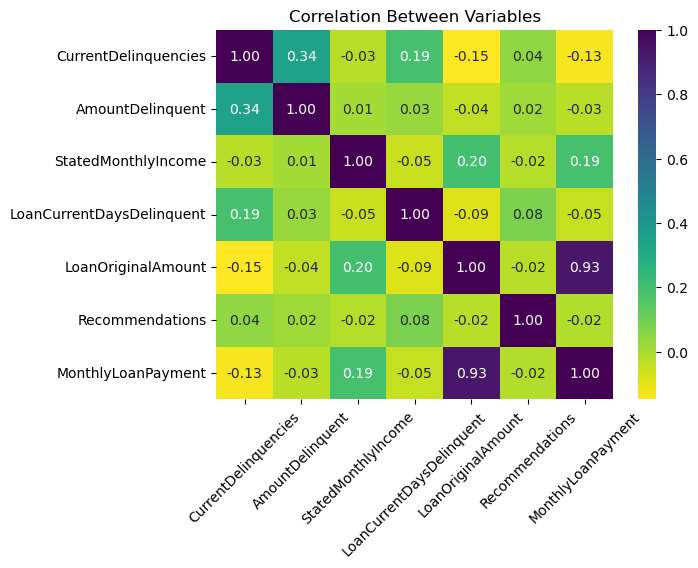

In [137]:
#create a heatmap to look at the relationships between variables and also get an accurate depiction of the correlation values.
my_cols = ["CurrentDelinquencies", "AmountDelinquent", "StatedMonthlyIncome", "LoanCurrentDaysDelinquent", "LoanOriginalAmount", "Recommendations", "MonthlyLoanPayment"]
heat(df[my_cols])
xt(45)
plt.title("Correlation Between Variables");

- Using the dataframe created earlier, I decided to plot the same variables with the `StatedMonthlyIncome` outliers removed.

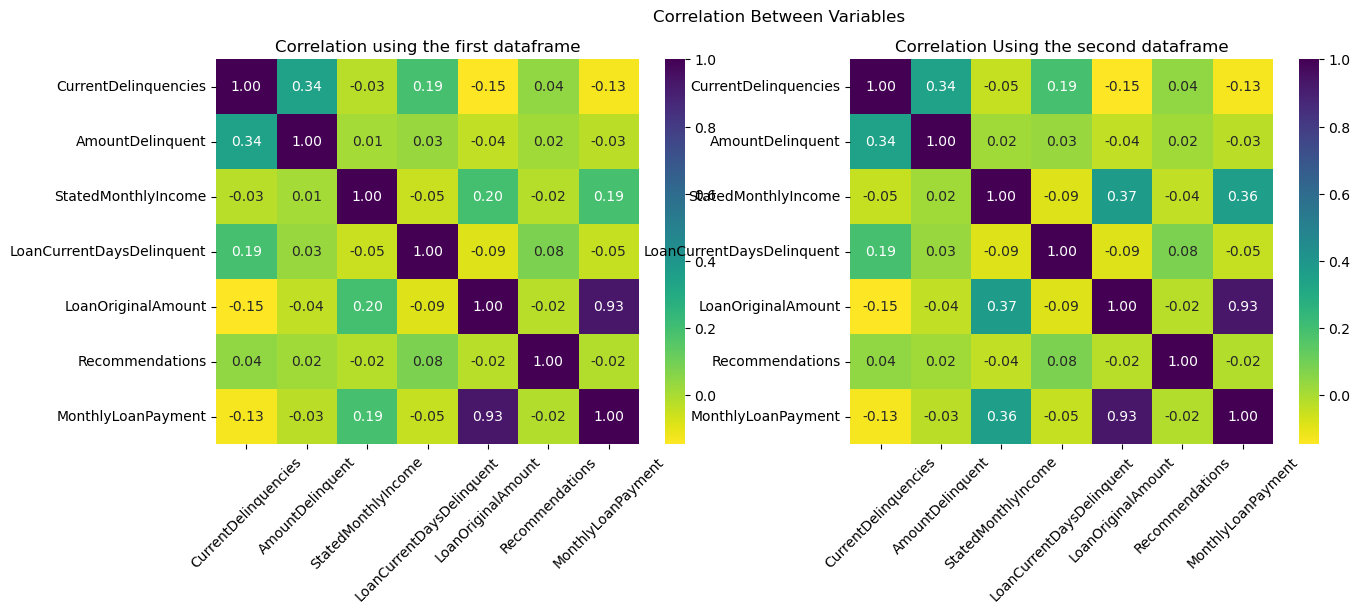

In [140]:
plot(15,5) #create a side-by-side plot to note any differences between the data points

plt.subplot(1, 2, 1)
heat(df[my_cols])
xt(45)
plt.suptitle("Correlation Between Variables");
plt.title("Correlation using the first dataframe");

plt.subplot(1, 2, 2)
heat(df_2[my_cols])
xt(45)
plt.title("Correlation Using the second dataframe");

> **General Observations:**
>
> Most of the variables have really weak correlations. The strongest relationships are between:
>   - `MonthlyLoanPayment` and `LoanOriginalAmount` (postive correlation of $0.93$)
>   - `CurrentDelinquencies` and `AmountDelinquent` (positive correlation of  $0.34$)
>   - `StatedMonthlyIncome` and `LoanOriginalAmount` (positive correlation of  $0.20$)
>   - `LoanCurrentDaysDelinquent` and `CurrnetDelinquencies` (positive correlation of  $0.19$)
>   - `CurrentDelinquencies` and `Loan OriginalAmount` (negative correlation of  $-0.15$)
> - The biggest difference noted between the two visualisations was that `StatedMonthlyIncome` and `LoanOriginalAmount` now have a positive correlation of  $0.35$

### 2. Monthly Income and Loan Amount

_**How does monthly income affect the loan amount disbursed to the borrower?**_

- We'll plot the monthly income against the loan amount and try to figure out how strong the correlation is.

In [142]:
#create a function for plotting scatter pots since we will be workign with a lot of numeric variables
def scat(data, x, y):
    plt.scatter(data = data, x = x, y = y);

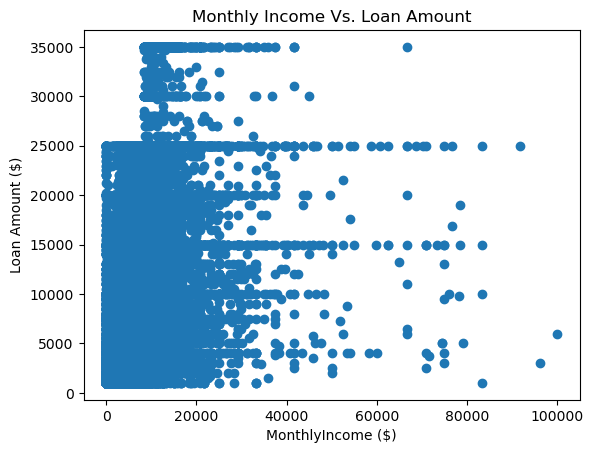

In [144]:
#using df_2 because the outliers have been removed in this data frame and should have a more accurate output.
scat(df_2, "StatedMonthlyIncome", "LoanOriginalAmount")
pltlabels("Monthly Income Vs. Loan Amount", "MonthlyIncome ($)", "Loan Amount ($)")

- Because the dataset has very many observations and is making the visualisation a bit hard to interpret, we'll plot the same data again using a sample of 200 random variables from the same dataset.

In [146]:
np.random.seed(3) # a function that generates random numbers
sample = np.random.choice(df_2.shape[0], 200, replace = False) #use df_2 because of the stated monthly income outliers
df_sample = df.loc[sample]

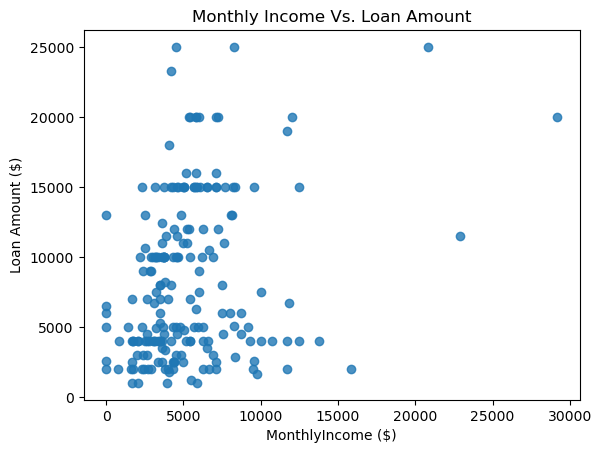

In [147]:
#use seaborn's regplot to be able to add some jitter and transparency
sns.regplot(data = df_sample, x= "StatedMonthlyIncome", y= "LoanOriginalAmount", fit_reg =False,
           x_jitter=0.3);
pltlabels("Monthly Income Vs. Loan Amount", "MonthlyIncome ($)", "Loan Amount ($)")

> **Monthly Income and Loan Amount Observation:**
>
> - When plotting with a subset of data, it's easier to see that there is a weak positive correlation between the two variables. However, there are some values that indicate a high monthly income but received lower loan amounts. These may represent some of the erroneous data similar to the outliers that were previously removed.

### 3. Current Delinquencies and Amount Delinquent

_**Does the number of delinquent payments affect the amount of delinquent payment?**_

- Here, we will plot the delinquent payments and delinquent amounts against each other to see if there is a correlation between the two.

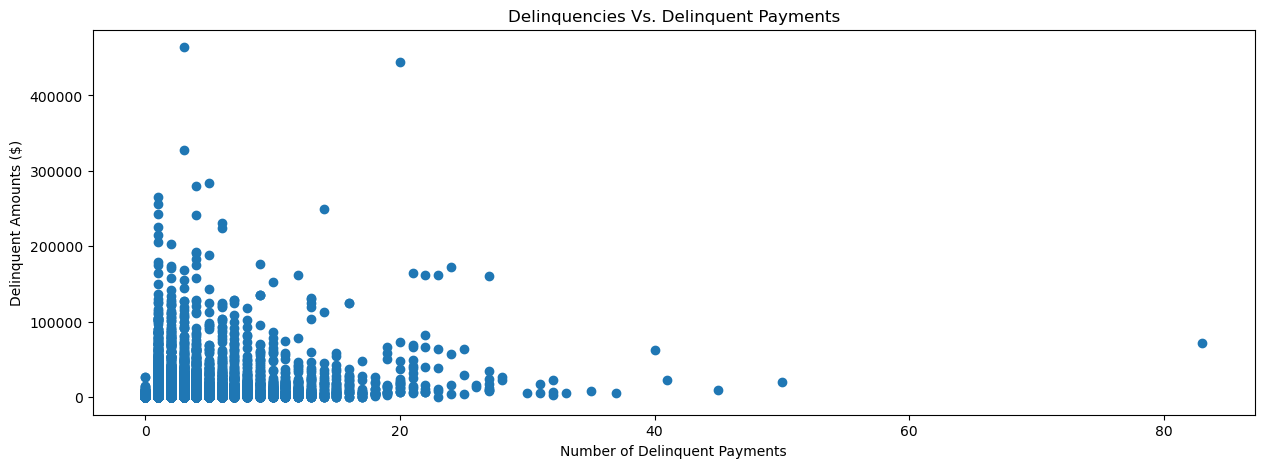

In [148]:
plot(15, 5)
scat(df, "CurrentDelinquencies","AmountDelinquent")
pltlabels( "Delinquencies Vs. Delinquent Payments", "Number of Delinquent Payments", "Delinquent Amounts ($)")

> **Delinquencies vs. Delinquency Amount Observation:**
>
> - A higher number of delinquencies seem to be for lower amounts, with even the highest number of delinquecies ($83$) being for around $1,000$ dollars. The higher delinquent amounts (upwards of $200,000$ dollars) display less than 20 delinquecies.
>
> - This variable (`CurrentDelinquencies`) becomes hard to interpret because someone might have many delinquent payments, but pay back a lumpsum at a particular point in time, or not have high delinquent amounts because their loan was not a large one.

### 4. Income Range and Loan Original Amount

**_How does income range affect the loan amount that borrowers receive?_**

- Here, we will plot the income range variable against the loan amounts to see if there is a correlation between the two.

In [149]:
#create defined functions for violin and box plots since we will be plotting a lot of numeric vs categorical variables.

def vplot(data, x, y):
    sns.violinplot(data = data, x = x, y = y, color = my_colour, inner = "quartile");
    xt(45)

def bplot(data, x, y):
    sns.boxplot(data = data, x = x, y = y, color = my_colour);
    xt(45)

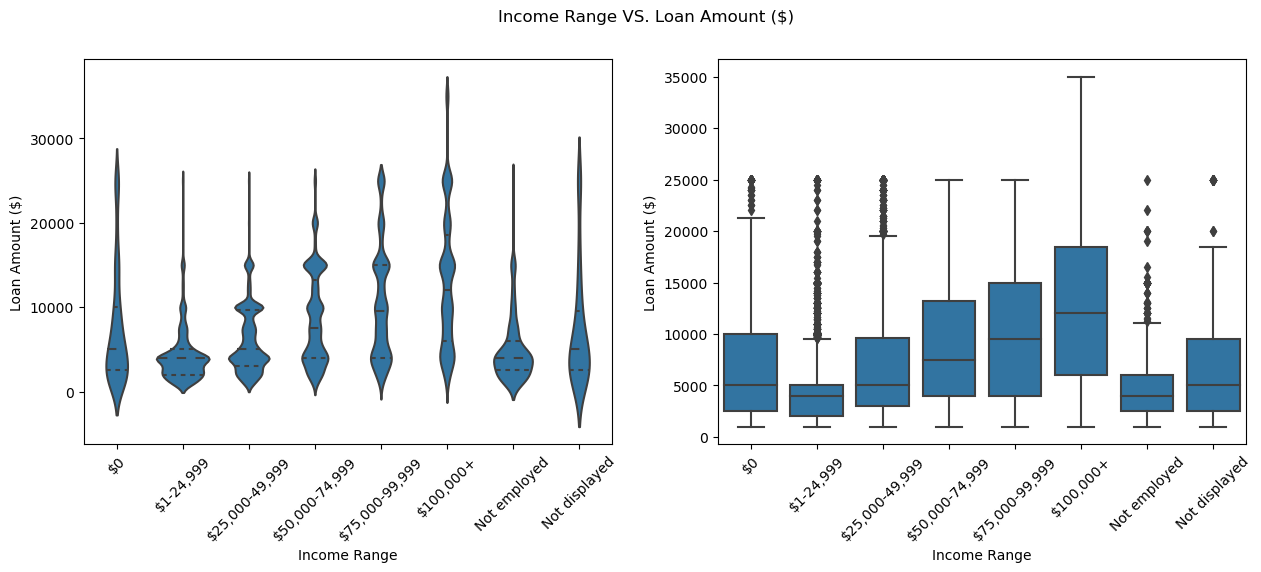

In [154]:
#because we are plotting categorical versus numeric variables, I'll create a side by side plot of a violin and box plot.
plot(15,5)

plt.subplot(1,2,1)
vplot(df, "IncomeRange", "LoanOriginalAmount")
pltlabels("", "Income Range", "Loan Amount ($)")
plt.suptitle ("Income Range VS. Loan Amount ($)")

plt.subplot(1,2,2)
bplot(df, "IncomeRange", "LoanOriginalAmount")
pltlabels("", "Income Range", "Loan Amount ($)")

In [155]:
#using this code to confirm the actual quartile amounts and confirm the distributions shown above.
df.groupby("IncomeRange").LoanOriginalAmount.describe()

,count,mean,std,min,25%,50%,75%,max
IncomeRange,,,,,,,,
$0,618.0,7421.016181,6815.819357,1000.0,2500.0,5000.0,10000.0,25000.0
"$1-24,999",7005.0,4295.129051,3261.290262,1000.0,2000.0,4000.0,5000.0,25000.0
"$25,000-49,999",31585.0,6172.260630,4058.305057,1000.0,3000.0,5000.0,9600.0,25000.0
"$50,000-74,999",30715.0,8648.565652,5432.543172,1000.0,4000.0,7500.0,13200.0,25000.0
"$75,000-99,999",16819.0,10350.432249,6619.070919,1000.0,4000.0,9500.0,15000.0,25000.0
"$100,000+",17297.0,13072.160548,8073.958887,1000.0,6000.0,12000.0,18500.0,35000.0
Not employed,804.0,4893.869403,3710.137361,1000.0,2500.0,4000.0,6000.0,25000.0
Not displayed,139.0,7208.985612,6917.064479,1000.0,2500.0,5000.0,9499.5,25000.0


> **Loan Amount vs Income Range Observation:**
>
> - People that earn between $1$ and $24,999$ dollars receive the lowest loan amount with a mean of $4,295$ dollars. People that earn over $100,000$ dollars receive the highest loan amounts with a mean of $13,072$ dollars and a max of $35,000$ dollars, which is the highest limit.

### 5. Listing Category and Original Loan Amount:

***How does the listing category affect the loan amount?***

- Here, we'll go ahead and plot the listing categories agains the loan amoutns offered and see if there were any listing categories more likely to get the borrowers higher loan amounts.

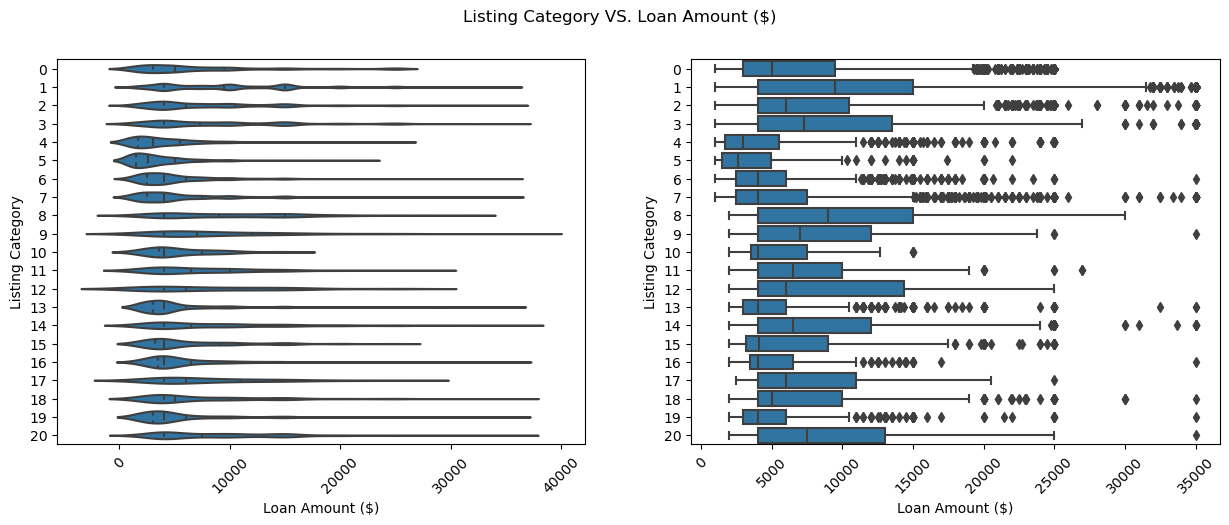

In [156]:
plot(15,5)

plt.subplot(1,2,1)
vplot(df, "LoanOriginalAmount", "ListingCategory (numeric)")
pltlabels("", "Loan Amount ($)", "Listing Category")
plt.suptitle ("Listing Category VS. Loan Amount ($)")

plt.subplot(1,2,2)
bplot(df, "LoanOriginalAmount", "ListingCategory (numeric)")
pltlabels("", "Loan Amount ($)", "Listing Category")

In [157]:
df.groupby("ListingCategory (numeric)").LoanOriginalAmount.describe()

,count,mean,std,min,25%,50%,75%,max
ListingCategory (numeric),,,,,,,,
0,9349.0,7170.506578,6098.165192,1000.0,3000.00,5000.0,9500.0,25000.0
1,57199.0,9943.527072,6423.912781,1000.0,4000.00,9500.0,15000.0,35000.0
2,7391.0,8099.386551,5860.092091,1000.0,4000.00,6000.0,10500.0,35000.0
3,7184.0,8927.573914,6531.150011,1000.0,4000.00,7289.5,13500.0,35000.0
4,2392.0,4556.511288,4316.777956,1000.0,1700.00,3000.0,5500.0,25000.0
5,756.0,3514.568783,2893.775384,1000.0,1500.00,2600.0,4988.5,22000.0
6,2561.0,4998.971105,3604.891357,1000.0,2500.00,4000.0,6000.0,35000.0
7,10398.0,5905.110598,4995.201238,1000.0,2500.00,4000.0,7500.0,35000.0
8,199.0,9751.396985,5808.873000,2000.0,4000.00,9000.0,15000.0,30000.0


> **Loan Amount and Listing Category Observations:**
>
> - Listing category **1 (_"Debt consolidation")_** has the highest number of loans  whereas listing category **17 (_"RV")_** has the lowest number.
>
> - Listing category **1** and **8 (_"Debt consolidation"_** and **_"Baby & Adoption")_** receive the highest loan amounts (over `$30,000`) based on their 3rd quartiles.
>
> - Listing category **4** and **5 (_"Personal Loan"_** and **_"Student Use")_** receive the lowest loan amounts (just over `$5,000`) respectively based on their 3rd quartiles.

### 4. Listing Category vs Income Range:

***What are borrowers from each income range most likely to take out loans for?***

- Here we will like to plot the income range against the listing categories to get an idea of what different incoem groups tend to take out loans for.

In [158]:
#create a dataframe of counts since we want to plot 2 quantitiative variables in a heatmap
list_counts = df.groupby(["ListingCategory (numeric)", "IncomeRange"]).size()
list_counts = list_counts.reset_index(name = 'count')
list_counts = list_counts.pivot(index = "ListingCategory (numeric)", columns = "IncomeRange", values = 'count')

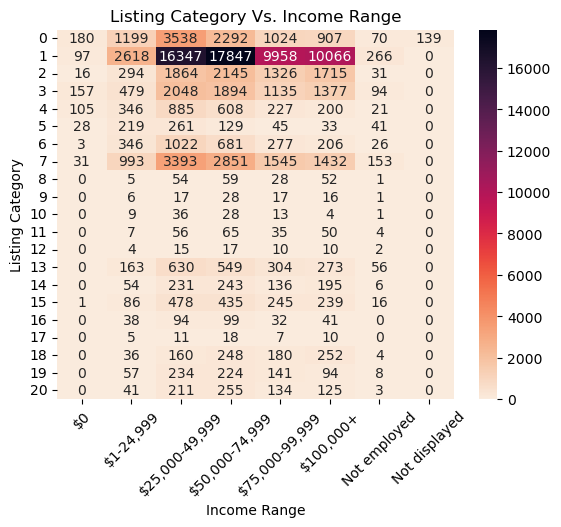

In [166]:
#plot a heatmap using the newly created dataframe
sns.heatmap(list_counts, cmap =  "rocket_r", annot = True, fmt = "d");
xt(45)
pltlabels("Listing Category Vs. Income Range", "Income Range", "Listing Category")

> **Listing Category vs Income Range:**
>
> - Borrowers between the income range of $50,000$ and $74,999$ dollars were most likely to take out loans for _**debt consolidation**_ and _**home improvements.**_

### 5. Loan Amount vs. Verifiable Income

_**Do borrowers with verifiable income receive higher loan amounts?**_

- Here we will look at income verifiability and compare it to the loan amounts to see if certain borrowers are more likely than others to get loans based on their income verifiability.

In [162]:
#get the distribution of delinquencies to select the correct bins
df.CurrentDelinquencies.describe()

count    104982.000000
mean          0.458793
std           1.570630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

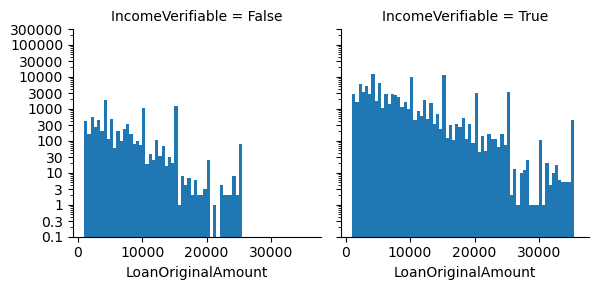

In [171]:
#create a faceted histogram to plot the verifiable income variable (qualitative) and the delinquent payments(quantitative)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000] #create relevant tick marks
labels = [i for i in ticks] #create labels based on the tickmarks
c = sns.FacetGrid(data = df, col = "IncomeVerifiable", col_wrap = 2, height = 3, aspect = 1);
c.map(plt.hist, "LoanOriginalAmount", bins = bins_loans).set(yscale = "log"); #convert to a log scale to be able to visualise both categories properly
c.set(yticks = ticks, yticklabels = labels);

> **Loan Amount vs. Verifiable Income Observation:**
>
> - People with **no verifiable income** receive lower loan amounts of $25,000$ dollars and less. People with **verifiable income** receive loan payments of up to $35,000$ dollars.

### 6. Current Delinquencies vs. Verifiable Income

_**Are borrowers with verifiable income less likely to have delinquent loan payments?**_

- Here we will plot income verifiability against delinquent payment to determine which kind of borrower is more likely to have delinquent payments.

In [164]:
df.CurrentDelinquencies.describe()

count    104982.000000
mean          0.458793
std           1.570630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          83.000000
Name: CurrentDelinquencies, dtype: float64

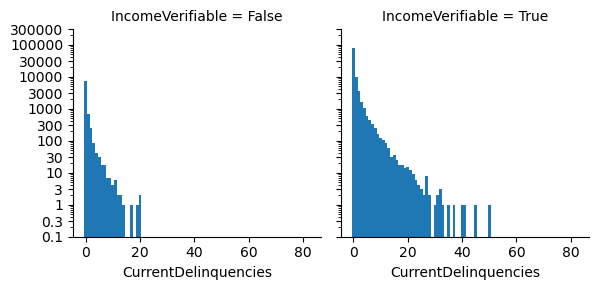

In [172]:
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000] #create relevant tick marks
labels = [i for i in ticks] #create labels based on the tickmarks
bins_delinquent = np.arange(-0.5, 83 + 0.5, 1)
c = sns.FacetGrid(data = df, col = "IncomeVerifiable", col_wrap = 2, height = 3, aspect = 1);
c.map(plt.hist, "CurrentDelinquencies", bins = bins_delinquent).set(yscale = "log"); #convert to a log scale to be able to visualise both categories properly
c.set(yticks = ticks, yticklabels = labels);

- Given that the numbers of borrowers with verifiable and non-verifiable income vary vastly, it's best to calculate the proportions and come up with a relative figure that will give a mroe definitive observation.

In [173]:
#calculate the deliquency statistics and group by income verifiability to calculate the proportions for accurate comparison
print(df.groupby("IncomeVerifiable").CurrentDelinquencies.describe())

                    count      mean       std  min  25%  50%  75%   max
IncomeVerifiable                                                       
False              8549.0  0.280267  1.038366  0.0  0.0  0.0  0.0  20.0
True              96433.0  0.474620  1.608391  0.0  0.0  0.0  0.0  83.0


In [174]:
#create a data frame of the counts of delinquencies grouped by verifiable income to get the proportions
delinquent_counts = df.groupby(["IncomeVerifiable", "CurrentDelinquencies"]).size() #create a new variable representing the counts of the variables we're itnerested in
delinquent_counts = delinquent_counts.reset_index(name = "count") #convert the series into a data frame
delinquent_counts = delinquent_counts.pivot(index = "CurrentDelinquencies", columns = "IncomeVerifiable", values = "count") #pivot the data to wide data.
delinquent_counts.head(2)

IncomeVerifiable,False,True
CurrentDelinquencies,,
0,7362.0,77934.0
1,702.0,9974.0


In [175]:
#calculate the proportion of delinquencies for each using the count of mean delinquencies, and the overall count of verifiable and non-verifiable.
proportion_nondelinquent_verifiable = 77934 / 96433 #count of people with 0 delinquencies over overall count of people in that income category
proportion_nondelinquent_nonverifiable = 7362 / 8549 ##count of people with 0 delinquencies over overall count of people in that income category
proportion_delinquent_verifiable = (96433 - 77934) / 96433 #total number minus those with 0 delinquecies to get the total number of delinquent payments
proportion_delinquent_non_verifiable = (8549 - 7362) / 8549
print(proportion_nondelinquent_verifiable, "of borrowers with verifiable income are likely to make payments on time" )
print(proportion_nondelinquent_nonverifiable, "of  borrowers with non-verifiable income are likely to make payments on time")
print(proportion_delinquent_verifiable, "of borrowers with verifiable income are likely to have delinquent payments")
print(proportion_delinquent_non_verifiable, "of borrowers with non-verifiable income are likely to have delinquent payments")

0.8081673286115749 of borrowers with verifiable income are likely to make payments on time
0.8611533512691543 of  borrowers with non-verifiable income are likely to make payments on time
0.19183267138842514 of borrowers with verifiable income are likely to have delinquent payments
0.1388466487308457 of borrowers with non-verifiable income are likely to have delinquent payments


> **Current Delinquencies vs. Verifiable Income Observation:**
>
>  - $0.86$ of borrowers with **non verifiable income** make their payments on time compared to only $0.80$ of those with verifiable income, making them more likely to make their payments on time.
>
> - $0.19$ of borrowers with **verifiable income** had delinquent payments, compared to only $0.13$ of their counterparts with nonverifiable income, making them slightly more likely to have delinquent payments.

### Bivariate Exploration Discussion

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - It was interesting to note that people without a verifiable income received such high loan amounts. I would have expected the cap to be much lower, at about $10,000$ dollars.
>
> - People with non verifiable income were more likely to make their payments on time and had fewer delinquent payments, which was an interesting discovery.
>
> - People who earned between $1$ and $24,999$ dollars received the lowest loans amount, even compared to those who listed their earnings as $0$, those who were not employed and those who did not have their income displayed, which was an interesting statistic.

## <u> Multivariate Exploration </u>

### 1. Listing Category vs Amount Delinquent vs Verifiable Income

_**What kind of loans do borrowers with non-verifiable income take out and do they have higher delinquency amounts?**_

- We will look at the lisiting category, delinquent amounts and income verifiablitiy variables together to determine the delinquency amounts based on income and listing.

In [178]:
#create a function for barplots since they will feature a lot in multivariate analysis

def bar(data, x, y, hue, title):
    sns.barplot(data = data, x = x, y = y, hue = hue);
    plt.legend(title = title);

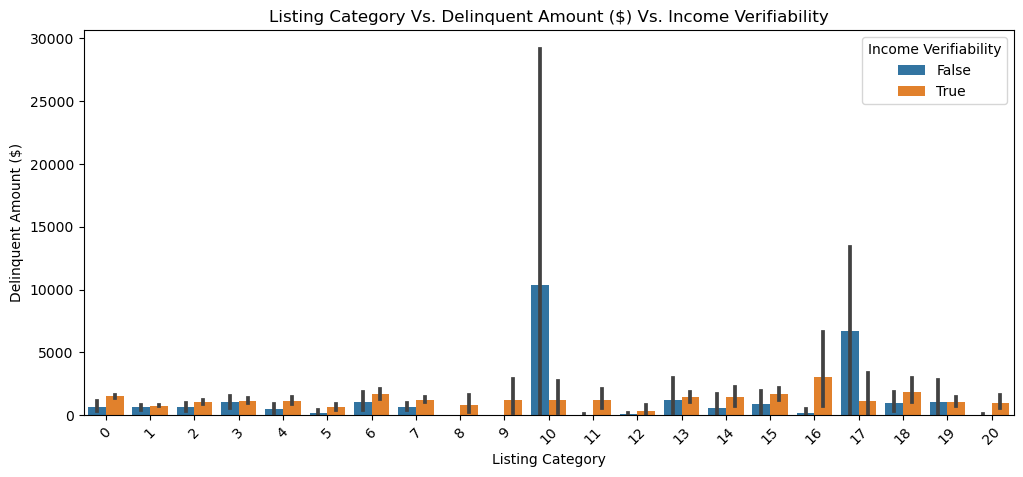

In [179]:
#create a barplot since we are working with 2 categorical variables and one numeric variable
plot(12, 5)
bar(df, "ListingCategory (numeric)", "AmountDelinquent", "IncomeVerifiable", "Income Verifiability")
xt(45)
pltlabels("Listing Category Vs. Delinquent Amount ($) Vs. Income Verifiability", "Listing Category", "Delinquent Amount ($)")

> **Listing Category vs Amount Delinquent vs Verifiable Income Observations:**
>
> - For most listing categories, borrowers with **verifiable income** had _higher_ loan delinquency amounts. However, for listing category **10** and **17** (_**cosmetic procedure**_ and _**RV**_) respectively have much higher loan delinquency amounts and are overwhelmingly related to those with no verifiable income.

### 2. Listing Category vs Loan Amount vs Verifiable Income

_**What kind of loans do borrowers with non-verifiable income take out and do they have higher loan amounts?**_

- We will look at the lisiting category, loan amounts and income verifiablitiy variables together to determine the loan amounts based on income and listing.

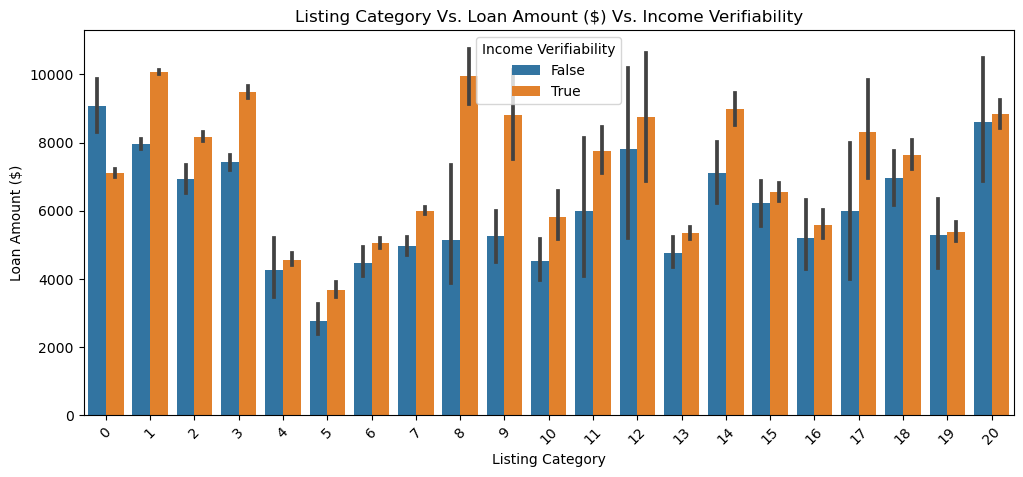

In [180]:
plot(12, 5)
bar(df, "ListingCategory (numeric)", "LoanOriginalAmount", "IncomeVerifiable", "Income Verifiability")
xt(45)
pltlabels("Listing Category Vs. Loan Amount ($) Vs. Income Verifiability", "Listing Category", "Loan Amount ($)")

> **Listing Category vs Original Loan Amount vs Verifiable Income Observations:**
>
> - Across the board, people with **verifiable income** recieve _higher_ loan amounts. The only category were this was not the case was listing category **0**, which is "Not Available." 
>
> - Listing category **8** and **9** (_**Baby and Adoption**_ and _**Boat**)_ were the 2 categories where the amount received by borrowers with **non-verifiable** income was significantly lower than the amount received by those with verifiable income.

### 3. Current Delinquencies vs Delinquent Amount vs Income Range
_**What income range has the highest delinquencies and delinquent amounts?**_

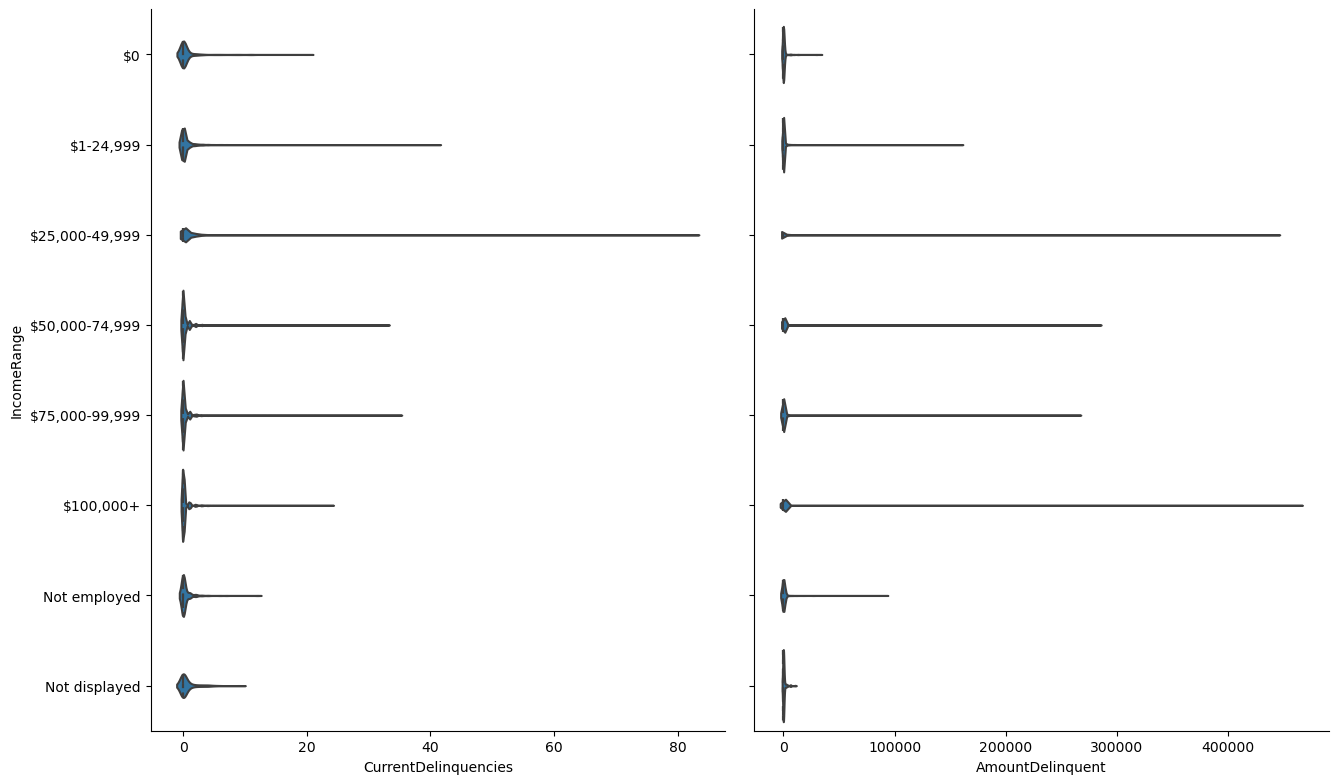

In [187]:
#create a grid of violin plots since we are working with 2 numerical variables and one categorical variable
e = sns.PairGrid(data = df, x_vars = ["CurrentDelinquencies", "AmountDelinquent"],
                y_vars = ["IncomeRange"], height = 8, aspect = 0.8);
e.map(sns.violinplot, inner = "quartile", color = my_colour);

> **Current Deliqneunces vs Amount Delinquent vs Income Range Observations:**
>
> - Borrowers beween the income range of $24,000$ **dollars** and $49,999$ **dollars** have the most number of current delinquencies and the second highest figure of delinquent amounts. The $100,000$ **dollar** income bracket have the highest delinquent amounts 
>
> - Borrowers listed as earning $0$ dollars have the lowest delinquent amounts (not counting those whose income is not displayed) whereas people who are **unemployed** have the lowest delinquent counts and amounts overall.

### 4. Loan Amount vs. Verifiable Income vs Income Range
_**What is the differenc in loan amounts between verified and non-verified income groups based on their listed income range?**_

- We will plot the loan amount against the income range while checking for incoem verifiability to determine how much it affects the loans amounts given to each income group.

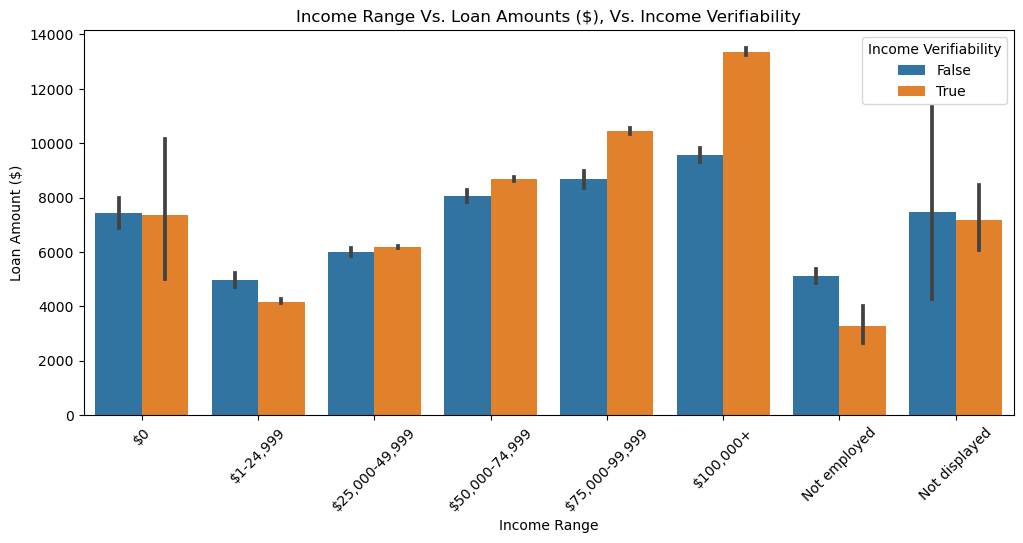

In [189]:
plot(12, 5)
bar(df, "IncomeRange", "LoanOriginalAmount", "IncomeVerifiable", "Income Verifiability");
xt(45)
pltlabels("Income Range Vs. Loan Amounts ($), Vs. Income Verifiability", "Income Range", "Loan Amount ($)")

> **Loan Amount vs. Verifiable Income vs Income Range Observations:**
>
> - The only "income ranges" where borrowers with non-verified income can get higher amounts than those with verified income are in the $0$ dollar category, the **"Not employed"** and the **"Not displayed"** categories.
>
> - For borrowers earning $100,000$ and over, having verified income significantly affects the loan amount received.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - People with non-verifiable income are either less likely to be approved or get much lower loan amounts for listings such as _Boats_ and _Cosmetic Procedures_. This shows that income verifiability is a strong indicator of how much money a borrower is likely to receive for a loan. Worth also noting is that people with non-verified income got the highest loan apporvals for listings that were _"Not Available"_ which means borrows may be more likely to be approved for loans if they do not state the reason for it.


### Were there any interesting or surprising interactions between features?

> - It was interesting to note that borrowers earning between $25,000$ and $49,999$ dollars had the most delinquencies and second highest delinquent loan amounts.
>
>
> - It was also interesting to see that people can declare their income range but not necessarily have it verified. I realised this could be due to some people taking out loans and not necessarily having formal employment. This could be a possible explanation for why borrowers listed as earning $0$ dollars, $1$ to $24,999$ dollars, those **unemployed** and **not displayed** received higher loan amounts than those with verifiable income within the same income ranges.

## <u> Conclusions </u>

Higher loan amounts lead to higher monthly loan payments. The highest loan amounts are typically reserved for those in higher income ranges with verifiable income.

The listing category seems to be an indicator that is used to determine a user's creditworthiness though borrowers seem to be able to choose to not disclose what the loan is for. Borrowers with unverifiable income would appear to receive a higher loan amount if they do not disclose what the loan is for.

It seems that income verifiability is not a good predictor of delinquent payments since most delinquencies and the highest delinquent amounts were from borrowers who had verified income.
